# Directing Customers Subscription Behavior For Finence through mobile application Analysis

## Goal of this Project : 

### Import essential libraries

In [1]:
# import libraries
import numpy as np     # for numeric calculation
import pandas as pd    # for data manupulation or analysis
import matplotlib.pyplot as plt    # for data visualization
import seaborn as sns    # for data visualization
from dateutil import parser   # convert time in date time data type

### Load Data Set

In [2]:
App_Data = pd.read_csv("FineTech_appData.csv")

In [3]:
# To show the all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
App_Data.shape

(50000, 12)

In [5]:
App_Data.head(10)

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   
5   56480  2013-04-03 09:58:15.752          2   09:00:00   20   
6  144649  2012-12-25 02:33:18.461          1   02:00:00   35   
7  249366  2012-12-11 03:07:49.875          1   03:00:00   26   
8  372004  2013-03-20 14:22:01.569          2   14:00:00   29   
9  338013  2013-04-26 18:22:16.013          4   18:00:00   26   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   
5  idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...          14         0   
6         product_review,product_review2,ScanPreview           3         0   
7  Splash,Cycle,Home,Credit3Container,Credit3Dash...          41         0   
8  product_review,product_review2,ScanPreview,Ver...          33         1   
9  Home,Loan2,product_review,product_review,produ...          19         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1  
5                     0         1  2013-04-03 09:59:03.291      0  
6                     0         0                      NaN      0  
7                     1         0                      NaN      0  
8                     1         1  2013-04-27 22:24:54.542      0  
9                     0         1  2013-04-26 18:31:58.923      0

### Finding & Filling the missing valules 

In [6]:
App_Data.isnull().sum().sum()

18926

In [7]:
App_Data.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [8]:
App_Data.describe()

user     dayofweek          age    numscreens      minigame  \
count   50000.000000  50000.000000  50000.00000  50000.000000  50000.000000   
mean   186889.729900      3.029860     31.72436     21.095900      0.107820   
std    107768.520361      2.031997     10.80331     15.728812      0.310156   
min        13.000000      0.000000     16.00000      1.000000      0.000000   
25%     93526.750000      1.000000     24.00000     10.000000      0.000000   
50%    187193.500000      3.000000     29.00000     18.000000      0.000000   
75%    279984.250000      5.000000     37.00000     28.000000      0.000000   
max    373662.000000      6.000000    101.00000    325.000000      1.000000   

       used_premium_feature      enrolled         liked  
count          50000.000000  50000.000000  50000.000000  
mean               0.172020      0.621480      0.165000  
std                0.377402      0.485023      0.371184  
min                0.000000      0.000000      0.000000  
25%                0.000000      0.000000      0.000000  
50%                0.000000      1.000000      0.000000  
75%                0.000000      1.000000      0.000000  
max                1.000000      1.000000      1.000000

In [9]:
App_Data.count()

user                    50000
first_open              50000
dayofweek               50000
hour                    50000
age                     50000
screen_list             50000
numscreens              50000
minigame                50000
used_premium_feature    50000
enrolled                50000
enrolled_date           31074
liked                   50000
dtype: int64

### Information About The Features of Data

In [10]:
App_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


### Object/categorical data type

In [11]:
App_Data.select_dtypes(include=['object']).columns

Index(['first_open', 'hour', 'screen_list', 'enrolled_date'], dtype='object')

### integer/float data type

In [12]:
App_Data.select_dtypes(include=['int64', 'float64']).columns

Index(['user', 'dayofweek', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

In [13]:
#  hour data convert string to int
App_Data['hour'] = App_Data.hour.str.slice(1,3).astype(int) 

# get data type of each columns
App_Data.dtypes    


user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [14]:
# Drop object dtype columns
App_Data2 = App_Data.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [15]:
App_Data2.head()

dayofweek  hour  age  numscreens  minigame  used_premium_feature  enrolled  \
0          3     2   23          15         0                     0         0   
1          6     1   24          13         0                     0         0   
2          1    19   23           3         0                     1         0   
3          4    16   28          40         0                     0         1   
4          1    18   31          32         0                     0         1   

   liked  
0      0  
1      0  
2      1  
3      0  
4      1

In [16]:
App_Data.shape

(50000, 12)

In [17]:
App_Data2.shape

(50000, 8)

In [18]:
#  Now we have only numerical data type
# so we use data visualization 

## Data Visualization

<Axes: >

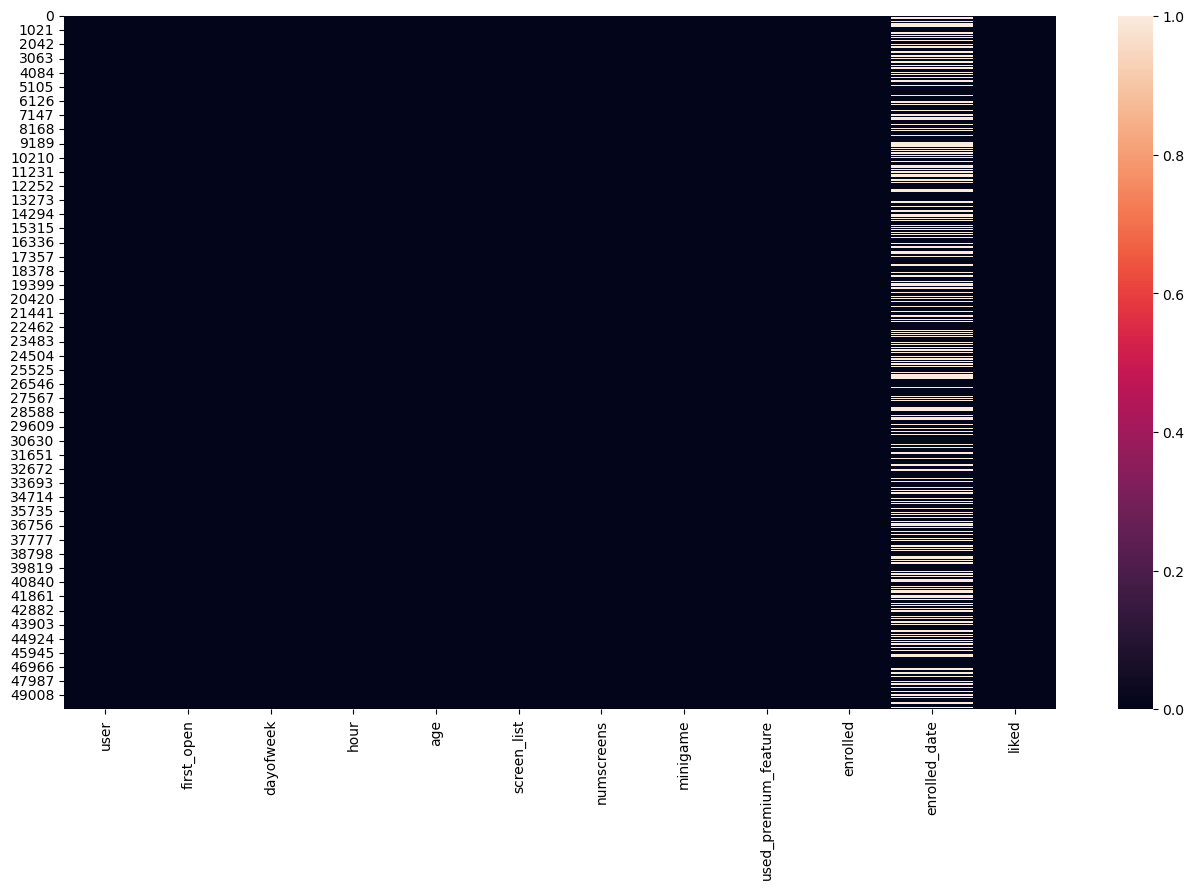

In [19]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(App_Data.isnull())

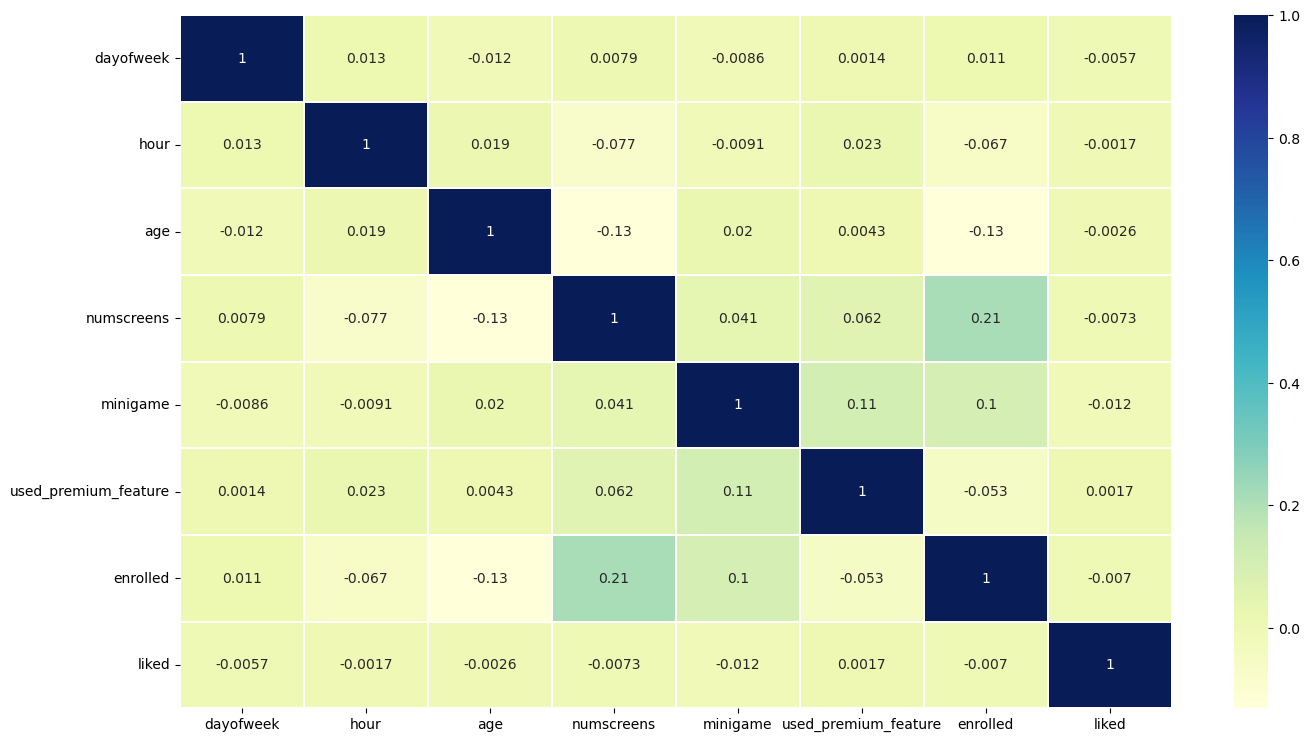

In [20]:
#correlation plot
plt.figure(figsize=(16,9))
sns.heatmap(App_Data2.corr(),annot=True,cmap='YlGnBu',linewidths=0.1)
plt.show()

In [29]:
# Pair plot of App_Data2
# The pair plot helps to visualize the distribution of data and scatter plot.


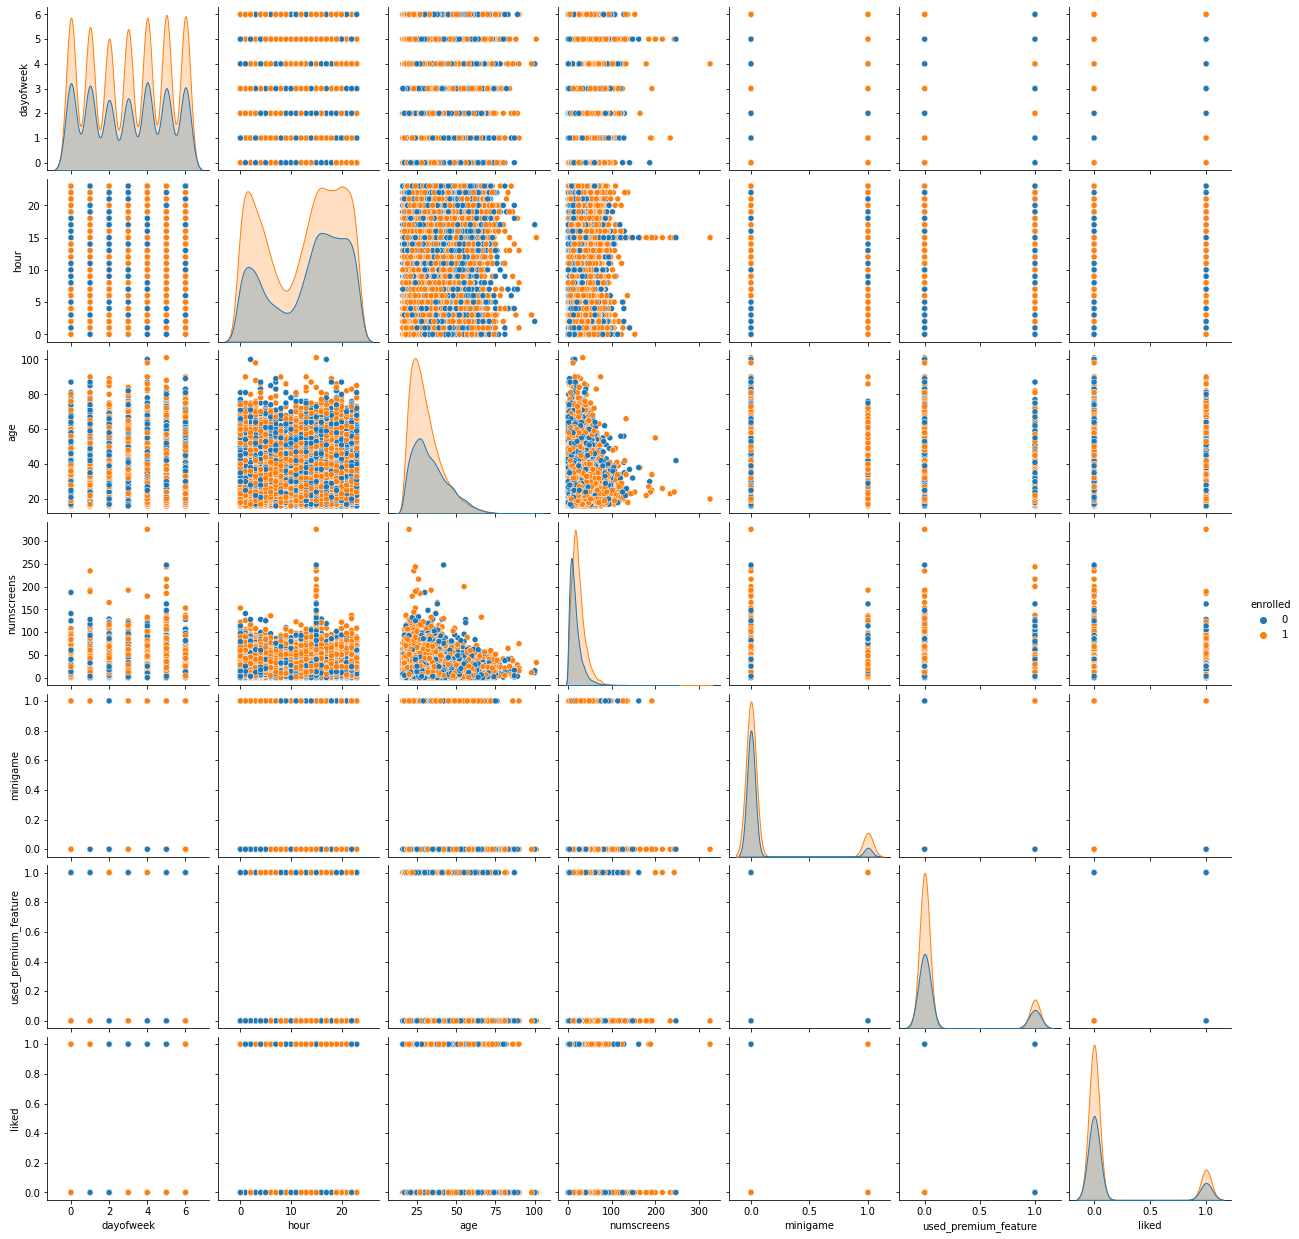

In [30]:
sns.pairplot(App_Data2, hue="enrolled")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


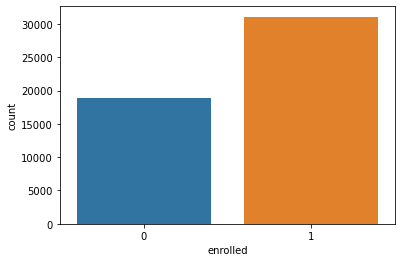

In [31]:
#counter plot
sns.countplot(App_Data2.enrolled)
plt.show()

In [32]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (App_Data2.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(App_Data2.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


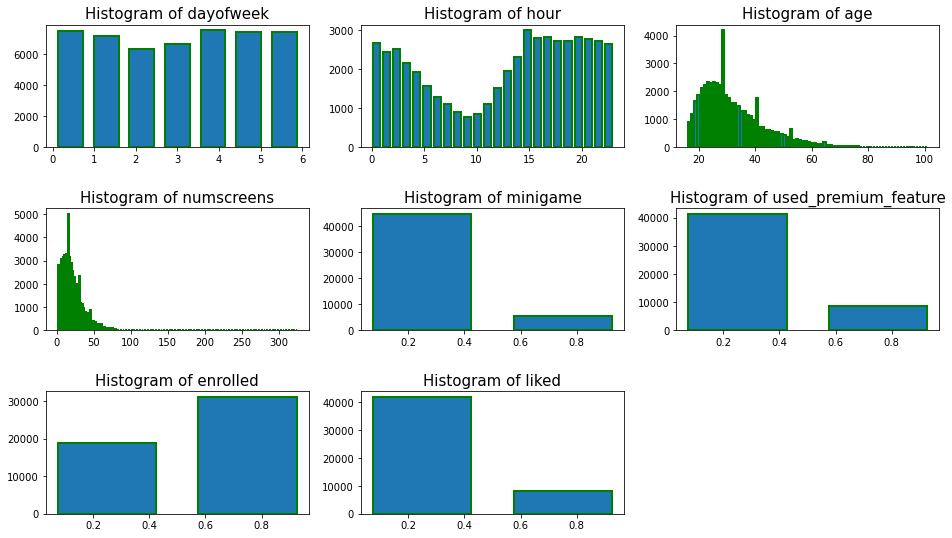

In [33]:
# plot histogram 
 
plt.figure(figsize = (16,9))
features = App_Data2.columns 
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) 
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(App_Data2[j].unique()) # bins for histogram
    plt.hist(App_Data2[j], bins = bins, rwidth = 0.7, edgecolor = "g", linewidth = 2, ) 
     
plt.subplots_adjust(hspace=0.5) 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


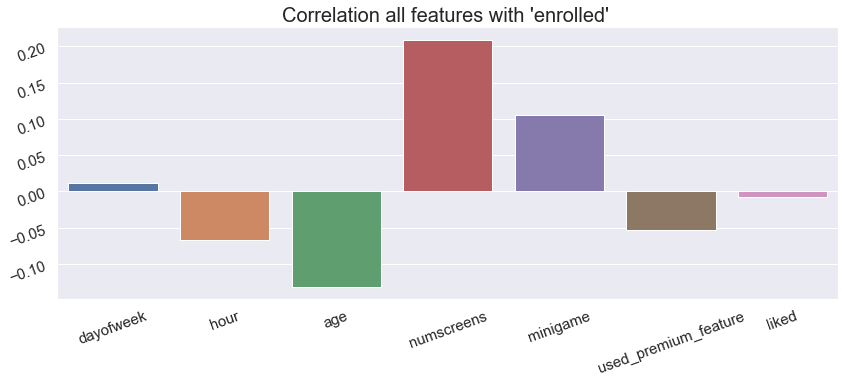

In [34]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
App_Data3 = App_Data2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(App_Data3.columns,App_Data3.corrwith(App_Data2.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x & y ticks font
plt.show()


### converting object data into numberic format

In [21]:
# parsinf object data into data time format
 
App_Data['first_open'] =[parser.parse(i) for i in App_Data['first_open']]
 
App_Data['enrolled_date'] =[parser.parse(i) if isinstance(i, str) else i for i in App_Data['enrolled_date']]
 
App_Data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [22]:
App_Data['time_to_enrolled']  = (App_Data.enrolled_date - App_Data.first_open).astype('timedelta64[h]')

In [23]:
App_Data.head()

user              first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:51.273          3     2   23   
1  333588 2012-12-02 01:16:00.905          6     1   24   
2  254414 2013-03-19 19:19:09.157          1    19   23   
3  234192 2013-07-05 16:08:46.354          4    16   28   
4   51549 2013-02-26 18:50:48.661          1    18   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled           enrolled_date  liked  \
0                     0         0                     NaT      0   
1                     0         0                     NaT      0   
2                     1         0                     NaT      1   
3                     0         1 2013-07-05 16:11:49.513      0   
4                     0         1 2013-02-26 18:56:37.841      1   

   time_to_enrolled  
0               NaN  
1               NaN  
2               NaN  
3               0.0  
4               0.0

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

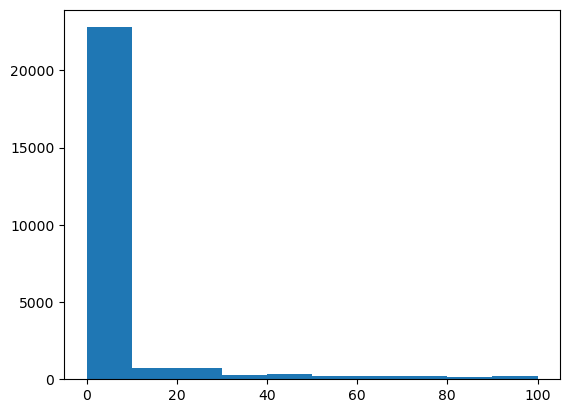

In [24]:
# Plot histogram
plt.hist(App_Data['time_to_enrolled'].dropna(), range = (0,100)) 

In [25]:
# Those customers have enrolled after 48 hours set as 0
App_Data.loc[App_Data.time_to_enrolled > 48, 'enrolled'] = 0

In [26]:
App_Data.head(10)

user              first_open  dayofweek  hour  age  \
0  235136 2012-12-27 02:14:51.273          3     2   23   
1  333588 2012-12-02 01:16:00.905          6     1   24   
2  254414 2013-03-19 19:19:09.157          1    19   23   
3  234192 2013-07-05 16:08:46.354          4    16   28   
4   51549 2013-02-26 18:50:48.661          1    18   31   
5   56480 2013-04-03 09:58:15.752          2     9   20   
6  144649 2012-12-25 02:33:18.461          1     2   35   
7  249366 2012-12-11 03:07:49.875          1     3   26   
8  372004 2013-03-20 14:22:01.569          2    14   29   
9  338013 2013-04-26 18:22:16.013          4    18   26   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   
5  idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...          14         0   
6         product_review,product_review2,ScanPreview           3         0   
7  Splash,Cycle,Home,Credit3Container,Credit3Dash...          41         0   
8  product_review,product_review2,ScanPreview,Ver...          33         1   
9  Home,Loan2,product_review,product_review,produ...          19         0   

   used_premium_feature  enrolled           enrolled_date  liked  \
0                     0         0                     NaT      0   
1                     0         0                     NaT      0   
2                     1         0                     NaT      1   
3                     0         1 2013-07-05 16:11:49.513      0   
4                     0         1 2013-02-26 18:56:37.841      1   
5                     0         1 2013-04-03 09:59:03.291      0   
6                     0         0                     NaT      0   
7                     1         0                     NaT      0   
8                     1         0 2013-04-27 22:24:54.542      0   
9                     0         1 2013-04-26 18:31:58.923      0   

   time_to_enrolled  
0               NaN  
1               NaN  
2               NaN  
3               0.0  
4               0.0  
5               0.0  
6               NaN  
7               NaN  
8             920.0  
9               0.0

In [27]:
App_Data.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace=True)

In [28]:
App_Data.shape

(50000, 10)

In [29]:
App_Data.head(15)

user  dayofweek  hour  age  \
0   235136          3     2   23   
1   333588          6     1   24   
2   254414          1    19   23   
3   234192          4    16   28   
4    51549          1    18   31   
5    56480          2     9   20   
6   144649          1     2   35   
7   249366          1     3   26   
8   372004          2    14   29   
9   338013          4    18   26   
10   43555          1     4   39   
11  317454          1    11   32   
12  205375          0     6   25   
13  307608          5    19   23   
14  359855          0     4   17   

                                          screen_list  numscreens  minigame  \
0   idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1   joinscreen,product_review,product_review2,Scan...          13         0   
2                                   Splash,Cycle,Loan           3         0   
3   product_review,Home,product_review,Loan3,Finan...          40         0   
4   idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   
5   idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...          14         0   
6          product_review,product_review2,ScanPreview           3         0   
7   Splash,Cycle,Home,Credit3Container,Credit3Dash...          41         0   
8   product_review,product_review2,ScanPreview,Ver...          33         1   
9   Home,Loan2,product_review,product_review,produ...          19         0   
10  Splash,idscreen,Home,RewardsContainer,Settings...          14         0   
11  product_review,Home,Loan2,Credit3Container,Ver...          25         1   
12  idscreen,joinscreen,Cycle,product_review,produ...          11         0   
13           Alerts,ProfilePage,Home,Credit3Container           4         0   
14  joinscreen,product_review,product_review2,Scan...           9         0   

    used_premium_feature  enrolled  liked  
0                      0         0      0  
1                      0         0      0  
2                      1         0      1  
3                      0         1      0  
4                      0         1      1  
5                      0         1      0  
6                      0         0      0  
7                      1         0      0  
8                      1         0      0  
9                      0         1      0  
10                     0         1      0  
11                     1         0      0  
12                     0         0      0  
13                     0         0      0  
14                     0         0      0

In [30]:
# read csv file and convert it into numpy array
App_screen_data = pd.read_csv("top_screens.csv").top_screens.values
 
App_screen_data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [31]:
App_Data['screen_list'] = App_Data.screen_list.astype(str) + ','

In [32]:
App_Data.head(10)

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   
5   56480          2     9   20   
6  144649          1     2   35   
7  249366          1     3   26   
8  372004          2    14   29   
9  338013          4    18   26   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                 Splash,Cycle,Loan,           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   
5  idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...          14         0   
6        product_review,product_review2,ScanPreview,           3         0   
7  Splash,Cycle,Home,Credit3Container,Credit3Dash...          41         0   
8  product_review,product_review2,ScanPreview,Ver...          33         1   
9  Home,Loan2,product_review,product_review,produ...          19         0   

   used_premium_feature  enrolled  liked  
0                     0         0      0  
1                     0         0      0  
2                     1         0      1  
3                     0         1      0  
4                     0         1      1  
5                     0         1      0  
6                     0         0      0  
7                     1         0      0  
8                     1         0      0  
9                     0         1      0

In [33]:
# string into to number

for screen_name in App_screen_data:
    App_Data[screen_name] = App_Data.screen_list.str.contains(screen_name).astype(int)
    App_Data['screen_list'] = App_Data.screen_list.str.replace(screen_name+",", "")

In [34]:
# test
App_Data.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [35]:
# get shape
App_Data.shape

(50000, 68)

In [36]:
# head of DataFrame
App_Data.head(6) # *****code 12

user  dayofweek  hour  age  \
0  235136          3     2   23   
1  333588          6     1   24   
2  254414          1    19   23   
3  234192          4    16   28   
4   51549          1    18   31   
5   56480          2     9   20   

                                         screen_list  numscreens  minigame  \
0  joinscreen,product_review,ScanPreview,VerifyTo...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                                              3         0   
3  product_review,Home,product_review,ReferralCon...          40         0   
4  joinscreen,ScanPreview,VerifySSN,Home,SelectIn...          32         0   
5  Home,ScanPreview,VerifySSN,product_review,prod...          14         0   

   used_premium_feature  enrolled  liked  Loan2  location  Institutions  \
0                     0         0      0      1         0             0   
1                     0         0      0      1         1             1   
2                     1         0      1      0         0             0   
3                     0         1      0      0         1             0   
4                     0         1      1      1         0             1   
5                     0         1      0      1         0             1   

   Credit3Container  VerifyPhone  BankVerification  VerifyDateOfBirth  \
0                 0            1                 0                  1   
1                 0            1                 0                  1   
2                 0            0                 0                  0   
3                 0            1                 0                  1   
4                 1            1                 1                  0   
5                 0            1                 0                  0   

   ProfilePage  VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  \
0            0              0      1         1                 0      0   
1            0              1      0         0                 0      0   
2            0              0      1         0                 0      0   
3            0              0      0         0                 0      1   
4            0              1      1         1                 0      0   
5            0              0      1         1                 1      0   

   CC1Category  Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  \
0            0       0     0    0                 0        0        0   
1            0       0     0    0                 0        0        0   
2            0       1     1    0                 0        0        0   
3            0       0     0    0                 0        1        1   
4            0       0     0    0                 0        0        1   
5            0       0     0    0                 0        0        1   

   EditProfile  Credit2  Finances  CC3  Saving9  Saving1  Alerts  Saving8  \
0            0        0         0    0        0        0       0        0   
1            0        0         0    0        0        0       0        0   
2            0        0         0    0        0        0       0        0   
3            0        1         1    0        0        0       0        0   
4            0        0         0    0        0        0       0        0   
5            0        0         0    0        0        0       0        0   

   Saving10  Leaderboard  Saving4  VerifyMobile  VerifyHousing  RewardDetail  \
0         0            0        0             0              0             0   
1         0            0        0             0              0             0   
2         0            0        0             0              0             0   
3         0            1        0             0              0             1   
4         0            0        0             0              0             0   
5         0            0        0             0              0             0   

   VerifyHousingAmount  ProfileMari

In [37]:
# remain screen in 'screen_list'
App_Data.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [38]:
App_Data.screen_list.str.count(",").head(6)

0     7
1     5
2     0
3     6
4    10
5     6
Name: screen_list, dtype: int64

In [39]:
# count remain screen list and store counted number in 'remain_screen_list'

App_Data['remain_screen_list'] = App_Data.screen_list.str.count(",")

In [40]:
# Drop the 'screen_list'
App_Data.drop(columns = ['screen_list'], inplace=True)

In [41]:
App_Data.head()

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   

   enrolled  liked  Loan2  location  Institutions  Credit3Container  \
0         0      0      1         0             0                 0   
1         0      0      1         1             1                 0   
2         0      1      0         0             0                 0   
3         1      0      0         1             0                 0   
4         1      1      1         0             1                 1   

   VerifyPhone  BankVerification  VerifyDateOfBirth  ProfilePage  \
0            1                 0                  1            0   
1            1                 0                  1            0   
2            0                 0                  0            0   
3            1                 0                  1            0   
4            1                 1                  0            0   

   VerifyCountry  Cycle  idscreen  Credit3Dashboard  Loan3  CC1Category  \
0              0      1         1                 0      0            0   
1              1      0         0                 0      0            0   
2              0      1         0                 0      0            0   
3              0      0         0                 0      1            0   
4              1      1         1                 0      0            0   

   Splash  Loan  CC1  RewardsContainer  Credit3  Credit1  EditProfile  \
0       0     0    0                 0        0        0            0   
1       0     0    0                 0        0        0            0   
2       1     1    0                 0        0        0            0   
3       0     0    0                 0        1        1            0   
4       0     0    0                 0        0        1            0   

   Credit2  Finances  CC3  Saving9  Saving1  Alerts  Saving8  Saving10  \
0        0         0    0        0        0       0        0         0   
1        0         0    0        0        0       0        0         0   
2        0         0    0        0        0       0        0         0   
3        1         1    0        0        0       0        0         0   
4        0         0    0        0        0       0        0         0   

   Leaderboard  Saving4  VerifyMobile  VerifyHousing  RewardDetail  \
0            0        0             0              0             0   
1            0        0             0              0             0   
2            0        0             0              0             0   
3            1        0             0              0             1   
4            0        0             0              0             0   

   VerifyHousingAmount  ProfileMaritalStatus  ProfileChildren   \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   ProfileEducation  Saving7  ProfileEducationMajor  Rewards  AccountView  \
0                 0        0                      0        0            0   
1                 0        0                      0        0            0   
2                 0        0                      0        0            0   
3                 0        0                      0        1            0   
4                 0        0                      0        0            0   

   VerifyAnnualIncome  VerifyIncomeType  Saving2  Saving6  Saving2Amount  \
0 

In [42]:
# total columns
App_Data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [43]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
App_Data['saving_screens_count'] = App_Data[saving_screens].sum(axis = 1)
App_Data.drop(columns = saving_screens, inplace = True)

In [44]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
App_Data['credit_screens_count'] = App_Data[credit_screens].sum(axis = 1)
App_Data.drop(columns = credit_screens, axis = 1, inplace = True)

In [45]:
App_Data.head(10)

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   
5   56480          2     9   20          14         0                     0   
6  144649          1     2   35           3         0                     0   
7  249366          1     3   26          41         0                     1   
8  372004          2    14   29          33         1                     1   
9  338013          4    18   26          19         0                     0   

   enrolled  liked  Loan2  location  Institutions  VerifyPhone  \
0         0      0      1         0             0            1   
1         0      0      1         1             1            1   
2         0      1      0         0             0            0   
3         1      0      0         1             0            1   
4         1      1      1         0             1            1   
5         1      0      1         0             1            1   
6         0      0      0         0             0            0   
7         0      0      1         0             0            1   
8         0      0      1         1             1            1   
9         1      0      1         1             0            1   

   BankVerification  VerifyDateOfBirth  ProfilePage  VerifyCountry  Cycle  \
0                 0                  1            0              0      1   
1                 0                  1            0              1      0   
2                 0                  0            0              0      1   
3                 0                  1            0              0      0   
4                 1                  0            0              1      1   
5                 0                  0            0              0      1   
6                 0                  0            0              0      0   
7                 1                  0            0              1      1   
8                 1                  0            0              1      0   
9                 1                  1            0              1      0   

   idscreen  Loan3  CC1Category  Splash  Loan  CC1  RewardsContainer  \
0         1      0            0       0     0    0                 0   
1         0      0            0       0     0    0                 0   
2         0      0            0       1     1    0                 0   
3         0      1            0       0     0    0                 0   
4         1      0            0       0     0    0                 0   
5         1      0            0       0     0    0                 0   
6         0      0            0       0     0    0                 0   
7         0      0            0       1     0    0                 0   
8         0      0            0       0     1    0                 1   
9         0      0            0       0     0    0                 0   

   EditProfile  Finances  CC3  Alerts  Leaderboard  VerifyMobile  \
0            0         0    0       0            0             0   
1            0         0    0       0            0             0   
2            0         0    0       0            0             0   
3            0         1    0       0            1             0   
4            0         0    0       0            0             0   
5            0         0    0       0            0             0   
6            0         0    0       0            0             0   
7            0         0    0       0            0             0   
8            0         0    0       0            0             0   
9            0         0    0       0            0             0   

   VerifyHousing  

In [46]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
App_Data['cc_screens_count'] = App_Data[cc_screens].sum(axis = 1)
App_Data.drop(columns = cc_screens, inplace = True)

In [47]:
App_Data.head(10)

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   
5   56480          2     9   20          14         0                     0   
6  144649          1     2   35           3         0                     0   
7  249366          1     3   26          41         0                     1   
8  372004          2    14   29          33         1                     1   
9  338013          4    18   26          19         0                     0   

   enrolled  liked  Loan2  location  Institutions  VerifyPhone  \
0         0      0      1         0             0            1   
1         0      0      1         1             1            1   
2         0      1      0         0             0            0   
3         1      0      0         1             0            1   
4         1      1      1         0             1            1   
5         1      0      1         0             1            1   
6         0      0      0         0             0            0   
7         0      0      1         0             0            1   
8         0      0      1         1             1            1   
9         1      0      1         1             0            1   

   BankVerification  VerifyDateOfBirth  ProfilePage  VerifyCountry  Cycle  \
0                 0                  1            0              0      1   
1                 0                  1            0              1      0   
2                 0                  0            0              0      1   
3                 0                  1            0              0      0   
4                 1                  0            0              1      1   
5                 0                  0            0              0      1   
6                 0                  0            0              0      0   
7                 1                  0            0              1      1   
8                 1                  0            0              1      0   
9                 1                  1            0              1      0   

   idscreen  Loan3  Splash  Loan  RewardsContainer  EditProfile  Finances  \
0         1      0       0     0                 0            0         0   
1         0      0       0     0                 0            0         0   
2         0      0       1     1                 0            0         0   
3         0      1       0     0                 0            0         1   
4         1      0       0     0                 0            0         0   
5         1      0       0     0                 0            0         0   
6         0      0       0     0                 0            0         0   
7         0      0       1     0                 0            0         0   
8         0      0       0     1                 1            0         0   
9         0      0       0     0                 0            0         0   

   Alerts  Leaderboard  VerifyMobile  VerifyHousing  RewardDetail  \
0       0            0             0              0             0   
1       0            0             0              0             0   
2       0            0             0              0             0   
3       0            1             0              0             1   
4       0            0             0              0             0   
5       0            0             0              0             0   
6       0            0             0              0             0   
7       0            0             0              0             0   
8       0            0             0              0             0   
9       0            0

In [48]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
App_Data['loan_screens_count'] = App_Data[loan_screens].sum(axis = 1)
App_Data.drop(columns = loan_screens, inplace = True)

In [49]:
App_Data.shape

(50000, 50)

In [50]:
App_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [51]:
App_Data.describe()

user     dayofweek          hour          age    numscreens  \
count   50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   186889.729900      3.029860     12.557220     31.72436     21.095900   
std    107768.520361      2.031997      7.438072     10.80331     15.728812   
min        13.000000      0.000000      0.000000     16.00000      1.000000   
25%     93526.750000      1.000000      5.000000     24.00000     10.000000   
50%    187193.500000      3.000000     14.000000     29.00000     18.000000   
75%    279984.250000      5.000000     19.000000     37.00000     28.000000   
max    373662.000000      6.000000     23.000000    101.00000    325.000000   

           minigame  used_premium_feature      enrolled         liked  \
count  50000.000000          50000.000000  50000.000000  50000.000000   
mean       0.107820              0.172020      0.497000      0.165000   
std        0.310156              0.377402      0.499996      0.371184   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.000000              0.000000      0.000000      0.000000   
50%        0.000000              0.000000      0.000000      0.000000   
75%        0.000000              0.000000      1.000000      0.000000   
max        1.000000              1.000000      1.000000      1.000000   

           location  Institutions   VerifyPhone  BankVerification  \
count  50000.000000  50000.000000  50000.000000      50000.000000   
mean       0.517760      0.293660      0.524600          0.319540   
std        0.499689      0.455443      0.499399          0.466303   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        1.000000      0.000000      1.000000          0.000000   
75%        1.000000      1.000000      1.000000          1.000000   
max        1.000000      1.000000      1.000000          1.000000   

       VerifyDateOfBirth   ProfilePage  VerifyCountry         Cycle  \
count       50000.000000  50000.000000   50000.000000  50000.000000   
mean            0.473480      0.158040       0.423160      0.364860   
std             0.499301      0.364782       0.494065      0.481396   
min             0.000000      0.000000       0.000000      0.000000   
25%             0.000000      0.000000       0.000000      0.000000   
50%             0.000000      0.000000       0.000000      0.000000   
75%             1.000000      0.000000       1.000000      1.000000   
max             1.000000      1.000000       1.000000      1.000000   

           idscreen        Splash  RewardsContainer   EditProfile  \
count  50000.000000  50000.000000      50000.000000  50000.000000   
mean       0.340700      0.200760          0.084000      0.048980   
std        0.473949      0.400573          0.277391      0.215828   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        1.000000      0.000000          0.000000      0.000000   
max        1.000000      1.000000          1.000000      1.000000   

           Finances        Alerts   Leaderboard  VerifyMobile  VerifyHousing  \
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000   
mean       0.076540      0.073720      0.051520      0.053860       0.045080   
std        0.265863      0.261317      0.221058      0.225743       0.207482   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      0.000000      0.000000      0.000000       0.000000   
75%        0.000000      0.000000      0.000000      0.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       RewardDetail  VerifyHousingAmount 

## Heatmap with correlation matrix of new fineTech_appData

<Axes: >

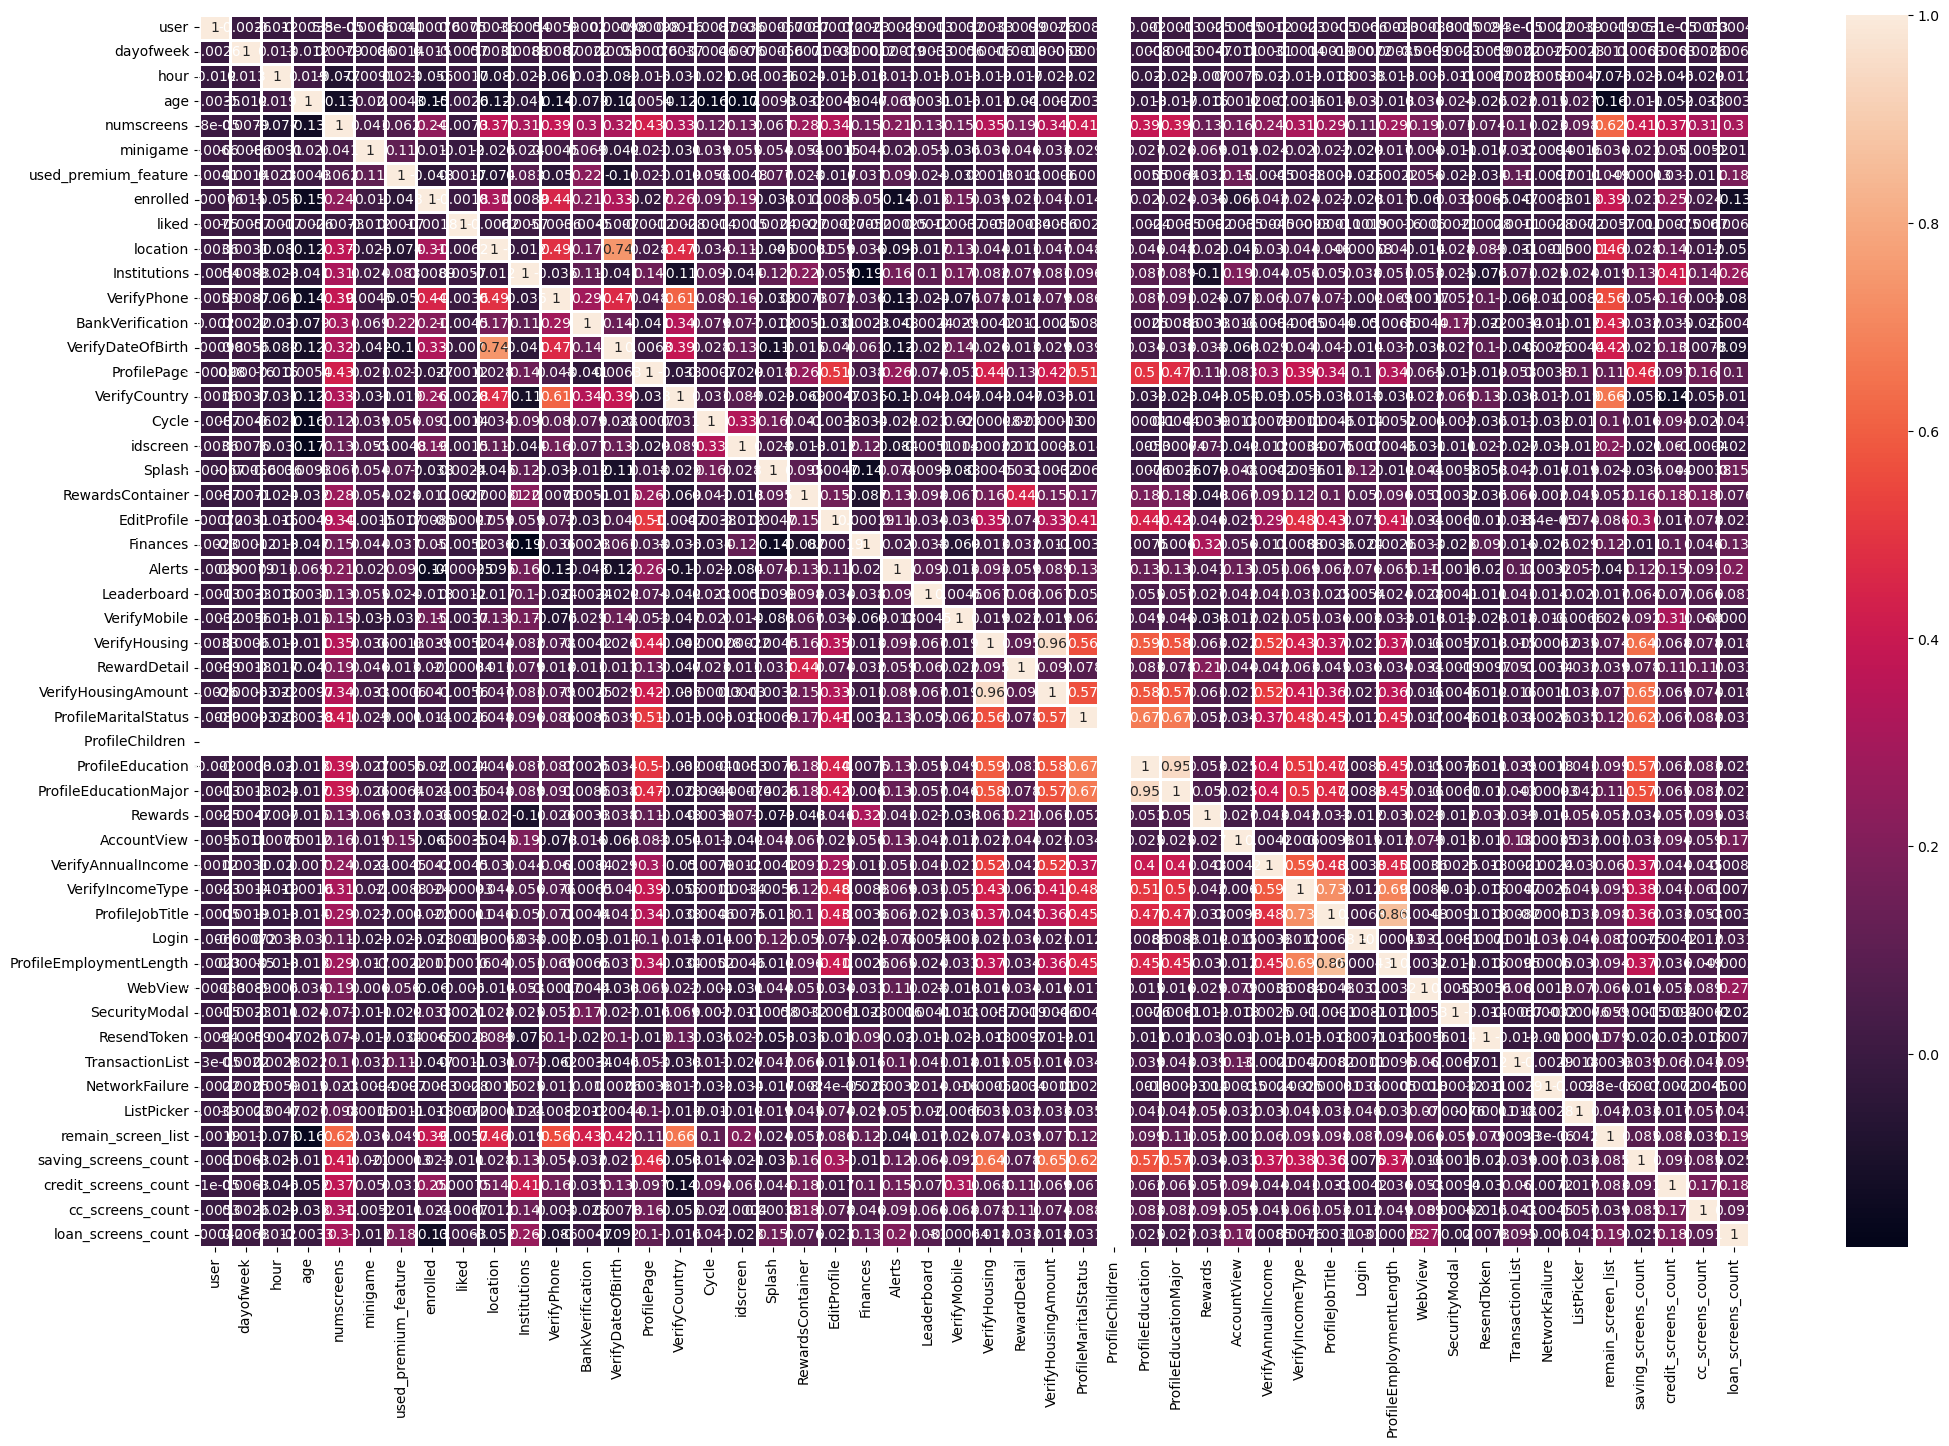

In [52]:
# Heatmap with correlation matrix of new fineTech_appData

plt.figure(figsize = (25,16)) 
sns.heatmap(App_Data.corr(), annot = True, linewidth =2) #*****code 13

## Split dataset in Train and Test

In [53]:
clean_App_Data = App_Data
target = App_Data['enrolled'] 
App_Data.drop(columns = 'enrolled', inplace = True)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(App_Data, target, test_size = 0.2, random_state = 0)

In [55]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [56]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

In [57]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)


Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


## Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Model Building

In [59]:
# impoer requiede packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree

In [60]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_score(y_test, y_pred_dt)

0.6936

In [61]:
 #train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_dt_sc)

0.6932

## K-NN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_score(y_test, y_pred_knn)

0.6978

In [63]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_knn_sc)

0.7314

## Naive Bayes

In [64]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_score(y_test, y_pred_nb)

0.7114

In [65]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_nb_sc)

0.7114

## Random Forest

In [66]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.7621

In [67]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_rf_sc)

0.7616

## Logistic Regression

In [68]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_score(y_test, y_pred_lr)

C:\Users\MANSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7683

In [145]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0)
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_lr_sc)

0.768

## Support Vector Machine

In [96]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_score(y_test, y_pred_svc)

0.7609

In [97]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)

accuracy_score(y_test, y_pred_svc_sc)

0.7789

Text(0.5, 1.0, 'Confussion Matrix')

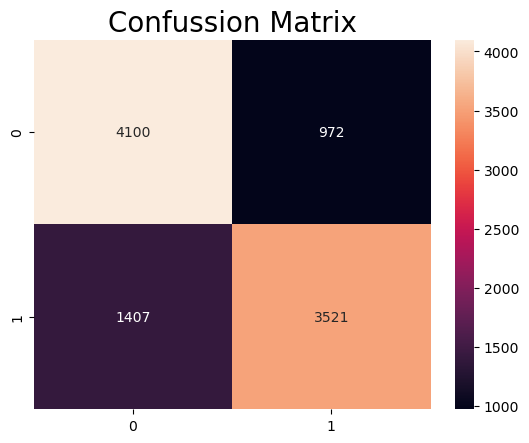

In [69]:
# confussion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20)  # *****code 14

In [70]:
# Clasification Report
cr_rf = classification_report(y_test, y_pred_rf)

print("Classification report >>> \n", cr_rf)

Classification report >>> 
               precision    recall  f1-score   support

           0       0.74      0.81      0.78      5072
           1       0.78      0.71      0.75      4928

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [71]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rf_model, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of random forest model = ",cross_validation)
print("Cross validation of random forest model (in mean) = ",cross_validation.mean())

Cross validation of random forest model =  [0.764   0.75675 0.7665  0.76775 0.756   0.7625  0.77175 0.766   0.76525
 0.75625]
Cross validation of random forest model (in mean) =  0.7632749999999999


## Mapping predicted output to the target

In [72]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_rf

final_result

user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
31902   65042         1                 0
30346  207226         1                 1
12363  363062         0                 0
32490  152296         1                 1
26128   64484         0                 0
14227   38108         1                 1
26376  359940         0                 0
44173  136089         0                 0
12968   14231         1                 1
32104  216038         0                 0
17844   18918         1                 1
43460  316730         1                 1
8369    28308         1                 0
15055  228387         1                 1
6338    69640         1                 1
15301  358264         0                 0
46250  348059         0                 0
45580  178743         1                 1
24647  167556         0                 0
46712  294101         0                 0
4150   192801         0                 0
42460  163983         1                 1
29079  298830         0                 0
19412  151790         1                 1
34839   20200         1                 1
34478  286678         1                 1
16956  329775         0                 0
29342  116814         1                 0
26351   83039         1                 1
271    154510         0                 0
24189   20373         0                 0
1399    67506         1                 1
5140   187707         1                 0
12649  178087         0                 1
19883  292933         1                 1
36238   91037         0                 1
34129  211226         0                 0
39915  259560         1                 1
39723  189180         0                 1
7346     9137         0                 0
8346   337458         1                 1
38676  190667         0                 1
21388  371267         1                 1
2838   223348         0                 0
48141  191295         0                 0
1984   323703         0                 0
22320  276739         0                 0
1083   210837         0                 0
30641   64190         0                 0
27739   90073         1                 1
4622   165549         0                 0
30351  278010         1                 1
40136  173992         0                 0
28428   72269         1                 1
45494  154100         0                 0
7187   148100         0                 0
10204  139112         1                 1
26750  318259         0                 0
44715  287637         1                 1
42944   59267         0                 0
21015  363851         0                 0
33753   34837         1                 0
913    294710         1                 0
45359  279724         0                 0
33325  202834         1                 1
16670  196560         0                 0
7496    31446         1                 1
49735  225230         1                 0
2123   355238         0                 0
39717  132524         1                 0
12167   92074         0                 0
32266  104781         0                 0
28900  275943         0                 0
16788  161758         1                 0
16537   60317         1                 1
37875  351868         1                 1
10632  174747         0                 0
12186   26899         1                 1
32712   83979         1                 0
2329    33061         1                 1
4937     6795         0                 0
46058  337416         0                 0
46458  113573         1                 1
9406   246438         0                 1
23165  211813         1                 0
42025  270344         1                 1
28518  242074         1                 1
43515    9491         0                 0
15009  270991         0                 0
24457  317052      